<a href="https://colab.research.google.com/github/jcarriel/Precauciones-de-seguridad/blob/master/Redes_recurrentes_Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance

  Using cached https://files.pythonhosted.org/packages/7a/e8/b9d7104d3a4bf39924799067592d9e59119fcfc900a425a12e80a3123ec8/yfinance-0.1.55.tar.gz
     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=5e7be3e264dd534cefac69a1273490aadce5c4ffc9fed6b28d9ee56605cf5e38
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [26]:
import yfinance as yf


def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-09-27,22.731960,18.380039,26.313443,22.731960,22.731960,-0.499265,-0.499265,-0.499265,1.005140,1.005140,1.005140,-1.504405,-1.504405,-1.504405,0.0,0.0,0.0,22.232694
1,2005-09-28,22.801545,18.158901,26.311912,22.801545,22.801545,-0.513971,-0.513971,-0.513971,1.024931,1.024931,1.024931,-1.538902,-1.538902,-1.538902,0.0,0.0,0.0,22.287574
2,2005-09-29,22.871130,18.229467,26.215452,22.871130,22.871130,-0.585589,-0.585589,-0.585589,0.985801,0.985801,0.985801,-1.571390,-1.571390,-1.571390,0.0,0.0,0.0,22.285541
3,2005-09-30,22.940716,18.450572,26.059360,22.940716,22.940716,-0.627241,-0.627241,-0.627241,0.973674,0.973674,0.973674,-1.600915,-1.600915,-1.600915,0.0,0.0,0.0,22.313475
4,2005-10-03,23.149472,18.456551,26.455351,23.149472,23.149472,-0.725840,-0.725840,-0.725840,0.936814,0.936814,0.936814,-1.662654,-1.662654,-1.662654,0.0,0.0,0.0,22.423631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,2021-07-29,1.848043,-3.032437,7.066084,-0.181532,3.746889,0.281775,0.281775,0.281775,0.985801,0.985801,0.985801,-0.704026,-0.704026,-0.704026,0.0,0.0,0.0,2.129818
4041,2021-07-30,1.812980,-2.752605,6.836025,-0.265848,3.758903,0.175053,0.175053,0.175053,0.973674,0.973674,0.973674,-0.798621,-0.798621,-0.798621,0.0,0.0,0.0,1.988034
4042,2021-07-31,1.777918,-6.705062,3.266421,-0.328734,3.783082,-3.359216,-3.359216,-3.359216,-2.463180,-2.463180,-2.463180,-0.896036,-0.896036,-0.896036,0.0,0.0,0.0,-1.581298
4043,2021-08-01,1.742855,-6.886721,3.229318,-0.386294,3.780421,-3.458319,-3.458319,-3.458319,-2.463180,-2.463180,-2.463180,-0.995139,-0.995139,-0.995139,0.0,0.0,0.0,-1.715464


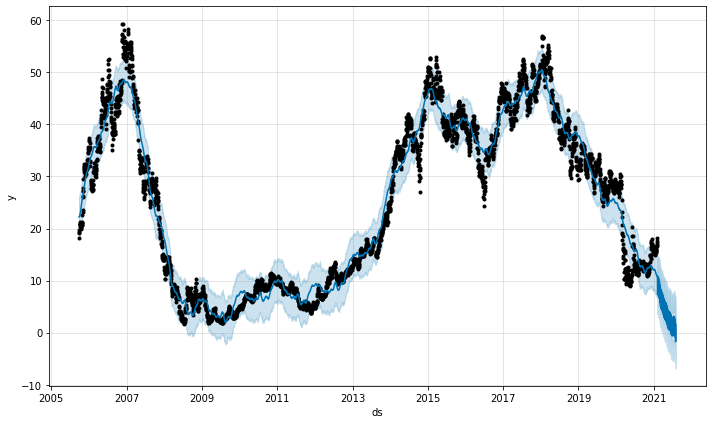

In [27]:
# American Airlines Group Inc. (AAL)
make_forecast('AAL', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-20,2.172651,1.415438,2.491809,2.172651,2.172651,-0.224448,-0.224448,-0.224448,0.103207,0.103207,0.103207,-0.327655,-0.327655,-0.327655,0.0,0.0,0.0,1.948204
1,2018-11-21,2.168369,1.382322,2.379554,2.168369,2.168369,-0.267332,-0.267332,-0.267332,0.087455,0.087455,0.087455,-0.354787,-0.354787,-0.354787,0.0,0.0,0.0,1.901037
2,2018-11-23,2.159804,1.370823,2.413064,2.159804,2.159804,-0.283719,-0.283719,-0.283719,0.120031,0.120031,0.120031,-0.403749,-0.403749,-0.403749,0.0,0.0,0.0,1.876086
3,2018-11-26,2.146957,1.275615,2.280504,2.146957,2.146957,-0.370836,-0.370836,-0.370836,0.094756,0.094756,0.094756,-0.465592,-0.465592,-0.465592,0.0,0.0,0.0,1.776122
4,2018-11-27,2.142675,1.264568,2.278278,2.142675,2.142675,-0.380375,-0.380375,-0.380375,0.103207,0.103207,0.103207,-0.483582,-0.483582,-0.483582,0.0,0.0,0.0,1.762300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,2021-07-29,4.211078,5.004652,6.346393,3.817274,4.598338,1.464895,1.464895,1.464895,0.102503,0.102503,0.102503,1.362392,1.362392,1.362392,0.0,0.0,0.0,5.675973
730,2021-07-30,4.214937,5.048867,6.408476,3.818491,4.605746,1.513550,1.513550,1.513550,0.120031,0.120031,0.120031,1.393519,1.393519,1.393519,0.0,0.0,0.0,5.728487
731,2021-07-31,4.218797,4.676757,6.017759,3.817525,4.613108,1.164780,1.164780,1.164780,-0.253976,-0.253976,-0.253976,1.418757,1.418757,1.418757,0.0,0.0,0.0,5.383578
732,2021-08-01,4.222657,4.702405,6.100674,3.817165,4.619955,1.183785,1.183785,1.183785,-0.253976,-0.253976,-0.253976,1.437762,1.437762,1.437762,0.0,0.0,0.0,5.406442


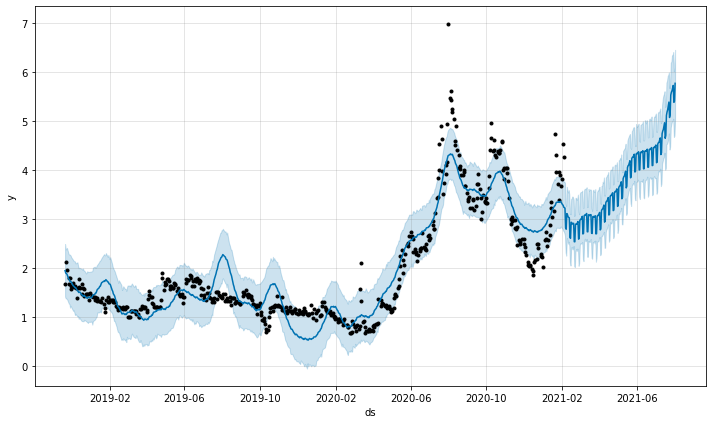

In [28]:
# Tesla Inc. (TLSA)
make_forecast('TLSA', 180)

**Conclusion:**

Yo personalmente considero que deberia invertir en American Airlines Group Inc., si bien es cierto sus acciones tienen menos valor pero, al mismo tiempo menos es costoso adquirirlas, y revisando la proyeccion es muy probable que el valor de estas sigan disminuyendo, esto debido a los viajes cancelados por la pandemia, yendo en contra de la proyeccion y teniendo fe que la situacion de la pandemia mejorará y habremos hecho una buena inversion.  